In [26]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams


In [27]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\monthly-beer-production-in-austr.csv")
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [28]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


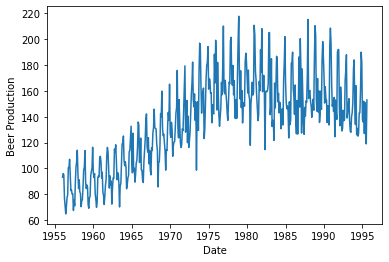

In [29]:
plt.xlabel('Date')
plt.ylabel('Beer Production')
plt.plot(df)

In [30]:
def decompose(timeseries):
    timeseries.dropna(inplace=True)
    decomposition=seasonal_decompose(timeseries)
    trend=decomposition.trend
    seasonal=decomposition.seasonal
    residual=decomposition.resid
    fig, (ax1, ax2,ax3, ax4) =plt.subplots (4, sharex=True, constrained_layout=False)
    ax1. set_title (" Visualizations for Timeseries,Trend, Seasonality and Resudials" )

    l1, =ax1.plot(timeseries,color='blue')

    l2, =ax2.plot(trend,color='red')

    l3, =ax3.plot(seasonal,color='green')

    l4, =ax4.plot(residual,color='blue')
    labels=['Time series','Tremd','Seasonality', 'Residuals']
    fig.legend(labels=labels, loc= 'lower center', ncol=5)
    plt.show()

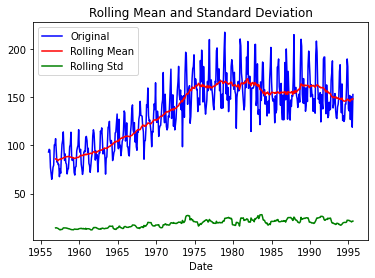

In [31]:
rolmean=df.rolling(window=12).mean()
rolstd=df.rolling(window=12).std()


orig=plt.plot(df,color='blue',label='Original')
aveg=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='green',label='Rolling Std')
plt.legend(loc='best')
plt.xlabel('Date')
plt.title("Rolling Mean and Standard Deviation")
plt.show ()

In [32]:
def adft(timeseries):
    print('Results of ADFT')
    adftest=adfuller(timeseries['value'],autolag='AIC')
    dfout=pd.Series(adftest[0:4],index=['Test Statistic','P-value','#Lags Used','Number of Observations used'])
    for key, value in adftest[4].items():
        dfout['Critical Value (%s)' %key]=value
    print(dfout)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


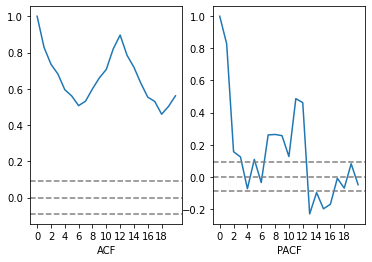

In [33]:
lag_acf=acf(df,nlags=20)
lag_pacf=pacf(df, nlags=20,method='ywm')

#plot ACF
plt.subplot (121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)), linestyle='--',color='gray')
plt.xticks(range(0,20,2))
plt.xlabel("ACF")

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)), linestyle='--',color='gray')
plt.xlabel("PACF")

plt.xticks(range(0,20,2))
plt.show()

In [34]:
model = ARIMA(df, seasonal_order=(2,2,1,12))
model_fit = model.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:>

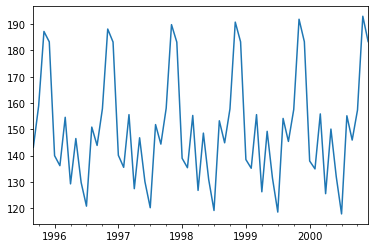

In [35]:
res = model_fit.forecast(64)
res.plot()